In [1]:

import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier, cv, Pool
from sklearn.svm import SVC
from sklearn.metrics import f1_score, precision_score, accuracy_score, recall_score, balanced_accuracy_score
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\HG\Desktop\Data sets\train1.csv", sep=",", encoding="utf-8")

In [3]:
df

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard


In [4]:
df["Month"].value_counts()

January     12500
February    12500
March       12500
April       12500
May         12500
June        12500
July        12500
August      12500
Name: Month, dtype: int64

In [5]:
df[df["Name"].isnull()]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
7,0x1609,CUS_0xd40,August,NaN,23,#F%$D@*&8,Scientist,19114.12,1824.843333,3,...,Good,809.98,23.933795,NaN,No,49.574949,24.785216509052056,High_spent_Medium_value_payments,358.12416760938714,Standard
17,0x161b,CUS_0x2dbc,February,NaN,34,486-85-3974,Engineer,143162.64,12187.220000,1,...,Good,1303.01,41.702573,17 Years and 10 Months,No,246.992319,232.86038375993544,High_spent_Small_value_payments,998.8692967863226,Good
22,0x1620,CUS_0x2dbc,July,NaN,34,486-85-3974,Engineer,143162.64,12187.220000,1,...,Good,1303.01,38.068624,18 Years and 3 Months,No,246.992319,263.17416316163934,High_spent_Small_value_payments,968.5555173846187,Standard
64,0x1662,CUS_0x4157,January,NaN,23,070-19-1622,Doctor,114838.41,9843.867500,2,...,Good,1377.74,33.664554,21 Years and 4 Months,No,226.892792,215.19351594560425,High_spent_Small_value_payments,802.3004421328528,Good
80,0x167a,CUS_0xa66b,January,NaN,40,221-30-8554,Teacher,33751.27,2948.605833,5,...,Standard,1328.93,37.089076,19 Years and 2 Months,NM,65.008174,117.30669710658556,High_spent_Medium_value_payments,362.54571194023237,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99964,0x25fba,CUS_0x372c,May,NaN,18,340-85-7301,Lawyer,42903.79,3468.315833,0,...,Good,1079.48,23.140640,28 Years and 5 Months,No,34.975457,450.6460933992599,Low_spent_Small_value_payments,151.210033,Good
99965,0x25fbb,CUS_0x372c,June,NaN,19,340-85-7301,Lawyer,42903.79,3468.315833,0,...,Good,1079.48,35.549456,28 Years and 6 Months,No,34.975457,187.3559686116327,Low_spent_Large_value_payments,394.500158,Good
99969,0x25fc3,CUS_0xf16,February,NaN,45,868-70-2218,Media_Manager,16680.35,1528.029167,1,...,Good,897.16,34.085971,21 Years and 2 Months,No,41.113561,104.64623687765652,High_spent_Small_value_payments,267.043119,Good
99973,0x25fc7,CUS_0xf16,June,NaN,45,868-70-2218,Media_Manager,16680.35,1528.029167,1,...,Good,897.16,24.972853,21 Years and 6 Months,No,41.113561,__10000__,Low_spent_Small_value_payments,233.301539,Good


In [6]:
df["Name"].value_counts()

Langep            44
Stevex            44
Vaughanl          39
Jessicad          39
Raymondr          38
                  ..
Alina Selyukhg     4
Habboushg          4
Mortimerq          4
Ronaldf            4
Timothyl           3
Name: Name, Length: 10139, dtype: int64

In [7]:
df["Name"].info()

<class 'pandas.core.series.Series'>

RangeIndex: 100000 entries, 0 to 99999

Series name: Name

Non-Null Count  Dtype 

--------------  ----- 

90015 non-null  object

dtypes: object(1)

memory usage: 781.4+ KB


In [8]:
df["Age"].info()

<class 'pandas.core.series.Series'>

RangeIndex: 100000 entries, 0 to 99999

Series name: Age

Non-Null Count   Dtype 

--------------   ----- 

100000 non-null  object

dtypes: object(1)

memory usage: 781.4+ KB


In [9]:
column_name = 'Age'

# تحويل العمود من نوع object إلى integer
df[column_name] = pd.to_numeric(df[column_name], errors='coerce').astype('Int64')


In [10]:
df[(df["Age"] > 60)]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
56,0x1656,CUS_0x5407,January,Annk,7580,500-92-6408,Media_Manager,34081.38_,NaN,8,...,Standard,1704.18,24.448063,NaN,NM,70.478333,162.4410091967751,Low_spent_Large_value_payments,298.19215813115227,Poor
122,0x16b8,CUS_0x33d2,March,Chalmersa,181,965-46-2491,Scientist,31993.78,2942.148333,6,...,Standard,818.22,27.380109,17 Years and 0 Months,Yes,45.141298,264.25708850339777,Low_spent_Small_value_payments,274.8164466052998,Standard
219,0x1749,CUS_0x3edc,April,Williamso,995,663-16-3845,Accountant,43070.24,3622.186667,3,...,Standard,1233.1,24.331772,19 Years and 5 Months,Yes,30.576085,74.92037487328841,High_spent_Medium_value_payments,506.7222069702167,Standard
243,0x176d,CUS_0x9a71,April,NaN,5079,889-07-2357,Scientist,20186.02,1684.168333,1,...,Good,413.32,22.743582,18 Years and 6 Months,No,29.534584,104.72383354456407,High_spent_Small_value_payments,294.1584160682732,Good
288,0x17b2,CUS_0x4080,January,ra Alperx,6409,995-37-8920,Mechanic,29469.98,2227.831667,1231,...,_,3421.66,24.639658,NaN,Yes,69.685459,59.825596124675045,!@9#%8,363.27211196971183,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99873,0x25f33,CUS_0x3855,February,Xolai,3891,963-55-7106,Scientist,118677.54,9963.795000,4,...,Good,995.47,36.065495,30 Years and 0 Months,No,237.106366,641.8495893985206,Low_spent_Medium_value_payments,397.423545,Standard
99877,0x25f37,CUS_0x3855,June,Xolai,6476,963-55-7106,Scientist,118677.54,9963.795000,4,...,Good,995.47,38.556181,30 Years and 4 Months,No,237.106366,231.2765296325449,High_spent_Large_value_payments,767.996604,Good
99913,0x25f6f,CUS_0x1619,February,Phil Wahbao,2263,683-59-7399,Media_Manager,20059.98,1523.665000,8,...,Good,909.01,25.982154,16 Years and 4 Months,No,45.076827,74.71358019803843,High_spent_Small_value_payments,292.576093,Poor
99950,0x25fa4,CUS_0x51b3,July,Ryana,1342,837-85-9800,Media_Manager,59146.36,4908.863333,3,...,_,418.03,38.199635,20 Years and 7 Months,No,26.778419,502.3763201756033,Low_spent_Small_value_payments,251.731594,Standard


In [11]:
df[(df["Age"] < 10)]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
113,0x16ab,CUS_0xff4,February,NaN,-500,655-05-7666,Entrepreneur,25546.26,NaN,8,...,Standard,758.44,29.711376,18 Years and 3 Months,Yes,101.328637,300.32323168069064,Low_spent_Small_value_payments,129.9336309554582,Standard
289,0x17b3,CUS_0x4080,February,ra Alperx,-500,995-37-8920,Mechanic,29469.98,2227.831667,7,...,Bad,3421.66,30.268411,13 Years and 3 Months,NM,69.685459,125.49176826031132,High_spent_Small_value_payments,287.6059398340756,Standard
340,0x17fe,CUS_0x9bc1,May,Jaisinghanij,-500,445-18-4420,Architect,20574.47,1740.539167,6,...,Standard,749.95,29.036164,11 Years and 3 Months,Yes,49.348666,139.97856227172545,Low_spent_Large_value_payments,254.72668807344257,Standard
560,0x194a,CUS_0x2827,January,Lisah,-500,486-07-1289,Scientist,144546.72,11809.560000,0,...,Good,1045.11,40.840687,22 Years and 11 Months,No,136.988557,573.4115904774258,High_spent_Small_value_payments,730.5558529037837,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99531,0x25d31,CUS_0x85dd,April,Lucianam,-500,767-36-7303,Lawyer,8974.555,NaN,10,...,Bad,1660.14,22.173985,16 Years and 6 Months,Yes,30.443262,27.83822717284169,Low_spent_Medium_value_payments,300.106469,Poor
99541,0x25d3f,CUS_0xc22f,June,McMillanw,-500,795-34-9348,Scientist,34671.15,2637.262500,4,...,Standard,1071.97,25.076571,21 Years and 8 Months,Yes,52.337589,104.78314244377886,High_spent_Small_value_payments,366.605518,Standard
99762,0x25e8c,CUS_0x1b07,March,Baldwinq,-500,739-15-8297,Accountant,17818.6,1659.883333,4,...,Standard,301.52,26.398987,18 Years and 5 Months,NM,11.581102,34.98032691383901,High_spent_Medium_value_payments,369.426905,Standard
99937,0x25f93,CUS_0xad4f,February,Sabina Zawadzkig,-500,226-45-0652,_______,22620.79,1722.065833,7,...,Standard,642.46,31.841872,NaN,No,0.000000,105.07629339039072,Low_spent_Large_value_payments,337.13029,Standard


In [12]:
df["Age"].describe()

count    95061.000000
mean       110.934505
std        689.407864
min       -500.000000
25%         24.000000
50%         33.000000
75%         42.000000
max       8698.000000
Name: Age, dtype: float64

In [13]:
df[df["Age"].isnull()]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,<NA>,004-07-5839,_______,34847.84,3037.986667,2,...,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard
54,0x1650,CUS_0x284a,July,Nadiaq,<NA>,#F%$D@*&8,Lawyer,10909427.0,NaN,0,...,Good,352.16,26.947565,31 Years and 1 Months,No,911.220179,930.3918977796665,!@9#%8,326.24183015224526,Good
58,0x1658,CUS_0x5407,March,Annk,<NA>,500-92-6408,Media_Manager,34081.38,NaN,8,...,Standard,1704.18,35.111552,14 Years and 9 Months,Yes,70.478333,199.7207654954979,Low_spent_Large_value_payments,260.9124018324295,Poor
71,0x1669,CUS_0x4157,August,Charlie Zhur,<NA>,070-19-1622,Doctor,114838.41,9843.867500,2,...,Good,1377.74,27.813354,21 Years and 11 Months,No,226.892792,254.57176724837916,High_spent_Large_value_payments,742.9221908300779,Standard
89,0x1687,CUS_0xc0ab,February,Soyoungd,<NA>,342-90-2649,Engineer,88640.24,7266.686667,3,...,Good,950.36,41.036168,25 Years and 6 Months,NM,135.173371,157.174788304235,High_spent_Large_value_payments,674.3205073907143,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99908,0x25f66,CUS_0xa053,May,t Astridn,<NA>,094-81-5856,Writer,87695.34,7337.945000,2,...,Good,361.68,28.147193,19 Years and 5 Months,No,65671.000000,168.79878418602146,High_spent_Large_value_payments,804.995716,Standard
99922,0x25f7c,CUS_0x2654,March,enj,<NA>,647-67-8889,Media_Manager,139664.96_,11777.746667,3,...,Standard,365.66,35.828569,29 Years and 9 Months,Yes,423.731016,124.13474999025516,High_spent_Large_value_payments,869.908901,Standard
99933,0x25f8b,CUS_0xb11c,June,Yinka Adegokej,<NA>,546-94-4789,Manager,15319.65,1460.637500,6,...,Bad,1453.61,24.846424,11 Years and 2 Months,Yes,28.182033,45.61171819143637,High_spent_Small_value_payments,332.269998,Standard
99942,0x25f98,CUS_0xad4f,July,Sabina Zawadzkig,<NA>,#F%$D@*&8,Developer,22620.79,1722.065833,6,...,Standard,642.46,24.714779,29 Years and 9 Months,No,0.000000,16.53218878920387,High_spent_Large_value_payments,395.674395,Poor


In [14]:
df["Age"].replace(-500,np.nan ,inplace=True)

In [15]:
df["Age"].isnull().sum()

5825

In [16]:
df[df["Age"] == -500]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score


In [17]:
df.loc[df["Age"] > 60, "Age"] = None

In [18]:
df[df["Age"] > 60]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score


In [19]:
df["Age"].isnull().sum()

7635

In [20]:
df["SSN"].info()

<class 'pandas.core.series.Series'>

RangeIndex: 100000 entries, 0 to 99999

Series name: SSN

Non-Null Count   Dtype 

--------------   ----- 

100000 non-null  object

dtypes: object(1)

memory usage: 781.4+ KB


In [21]:
df["SSN"].value_counts()

#F%$D@*&8      5572
078-73-5990       8
486-78-3816       8
750-67-7525       8
903-50-0305       8
               ... 
856-06-6147       4
753-72-2651       4
331-28-1921       4
604-62-6133       4
286-44-9634       4
Name: SSN, Length: 12501, dtype: int64

In [22]:
df["SSN"].isnull().sum()

0

In [23]:
df[df["SSN"] =="#F%$D@*&8"]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
7,0x1609,CUS_0xd40,August,NaN,23,#F%$D@*&8,Scientist,19114.12,1824.843333,3,...,Good,809.98,23.933795,NaN,No,49.574949,24.785216509052056,High_spent_Medium_value_payments,358.12416760938714,Standard
29,0x162b,CUS_0xb891,June,Jasond,55,#F%$D@*&8,_______,30689.89,2612.490833,2,...,_,632.46,27.445422,17 Years and 8 Months,No,16.415452,84.95284817115969,High_spent_Small_value_payments,419.8807835023488,Standard
51,0x164d,CUS_0x284a,April,Nadiaq,34,#F%$D@*&8,Lawyer,131313.4,10469.207759,0,...,Good,352.16,42.645785,30 Years and 10 Months,No,23834.000000,337.43495631738324,High_spent_Medium_value_payments,899.1987716145285,Good
54,0x1650,CUS_0x284a,July,Nadiaq,<NA>,#F%$D@*&8,Lawyer,10909427.0,NaN,0,...,Good,352.16,26.947565,31 Years and 1 Months,No,911.220179,930.3918977796665,!@9#%8,326.24183015224526,Good
98,0x1694,CUS_0x3e45,March,Harriet McLeodd,35,#F%$D@*&8,Entrepreneur,54392.16_,NaN,6,...,_,179.22,31.258928,27 Years and 0 Months,NM,124.392082,33.349568589344514,High_spent_Large_value_payments,558.9263489897351,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99914,0x25f70,CUS_0x1619,March,Phil Wahbao,54,#F%$D@*&8,Media_Manager,20059.98,1523.665000,8,...,Good,909.01,29.204711,16 Years and 5 Months,No,45.076827,111.56713873012444,Low_spent_Large_value_payments,265.722534,Poor
99942,0x25f98,CUS_0xad4f,July,Sabina Zawadzkig,<NA>,#F%$D@*&8,Developer,22620.79,1722.065833,6,...,Standard,642.46,24.714779,29 Years and 9 Months,No,0.000000,16.53218878920387,High_spent_Large_value_payments,395.674395,Poor
99946,0x25fa0,CUS_0x51b3,March,Ryana,33,#F%$D@*&8,Media_Manager,59146.36,4908.863333,2,...,Good,418.03,35.750925,20 Years and 3 Months,No,26.778419,188.54469705568923,High_spent_Medium_value_payments,525.563217,Standard
99968,0x25fc2,CUS_0xf16,January,Maria Sheahanb,44,#F%$D@*&8,Media_Manager,16680.35,1528.029167,1,...,Good,897.16,39.868572,NaN,NM,41.113561,52.95197781627658,High_spent_Small_value_payments,318.737378,Good


In [24]:
df["SSN"].replace("#F%$D@*&8",np.nan ,inplace=True)

In [25]:
df["SSN"].isnull().sum()

5572

In [26]:
df["Occupation"].value_counts()

_______          7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: Occupation, dtype: int64

In [27]:
df[df["Occupation"] =="_______"]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,<NA>,004-07-5839,_______,34847.84,3037.986667,2,...,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard
16,0x161a,CUS_0x2dbc,January,Langep,34,486-85-3974,_______,143162.64,12187.220000,1,...,Good,1303.01,28.616735,17 Years and 9 Months,No,246.992319,168.413702679309,!@9#%8,1043.3159778669492,Good
18,0x161c,CUS_0x2dbc,March,Langep,34,486-85-3974,_______,143162.64,NaN,1,...,Good,1303.01,26.519815,17 Years and 11 Months,No,246.992319,__10000__,High_spent_Small_value_payments,715.741367403555,Good
20,0x161e,CUS_0x2dbc,May,Langep,34,486-85-3974,_______,143162.64,12187.220000,1,...,Good,1303.01,31.376150,18 Years and 1 Months,No,246.992319,430.9475278803298,Low_spent_Large_value_payments,810.7821526659284,Good
29,0x162b,CUS_0xb891,June,Jasond,55,NaN,_______,30689.89,2612.490833,2,...,_,632.46,27.445422,17 Years and 8 Months,No,16.415452,84.95284817115969,High_spent_Small_value_payments,419.8807835023488,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99920,0x25f7a,CUS_0x2654,January,enj,37,647-67-8889,_______,139664.96,11777.746667,3,...,_,365.66,31.043048,29 Years and 7 Months,Yes,423.731016,282.78234595777644,High_spent_Large_value_payments,711.261305,Standard
99935,0x25f8d,CUS_0xb11c,August,Yinka Adegokej,38,546-94-4789,_______,15319.65,1460.637500,6,...,Bad,1453.61,34.557510,11 Years and 4 Months,Yes,28.182033,191.87777851803025,Low_spent_Small_value_payments,216.003938,Poor
99937,0x25f93,CUS_0xad4f,February,Sabina Zawadzkig,<NA>,226-45-0652,_______,22620.79,1722.065833,7,...,Standard,642.46,31.841872,NaN,No,0.000000,105.07629339039072,Low_spent_Large_value_payments,337.13029,Standard
99943,0x25f99,CUS_0xad4f,August,Sabina Zawadzkig,48,226-45-0652,_______,22620.79,NaN,6,...,_,642.46,34.026427,29 Years and 10 Months,No,0.000000,205.21728040016708,Low_spent_Small_value_payments,256.989303,Poor


In [28]:
df["Occupation"].isnull().sum()

0

In [29]:
df["Occupation"].replace("_______",np.nan ,inplace=True)

In [30]:
df["Occupation"].isnull().sum()

7062

In [31]:
df[df["ID"] =="0x1610"]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
10,0x1610,CUS_0x21b1,March,Rick Rothackerj,28,004-07-5839,Teacher,34847.84_,3037.986667,2,...,_,605.03,33.224951,26 Years and 9 Months,No,18.816215,58.51597569589465,High_spent_Large_value_payments,466.46647639764313,Standard


In [32]:
#لحذف _ من اخر الرقم
def remove_(data):
    if data[-1] =="_":
        return data[:-1]
    else:
        return data[:]


In [33]:
df["Annual_Income"] = df["Annual_Income"].apply(remove_)

In [34]:
df[df["ID"] =="0x1610"]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
10,0x1610,CUS_0x21b1,March,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,_,605.03,33.224951,26 Years and 9 Months,No,18.816215,58.51597569589465,High_spent_Large_value_payments,466.46647639764313,Standard


In [35]:
column_name = 'Annual_Income'

# تحويل العمود من نوع object إلى float
df[column_name] = pd.to_numeric(df[column_name], errors='coerce').astype('float64')


In [36]:
df["Annual_Income"].info()

<class 'pandas.core.series.Series'>

RangeIndex: 100000 entries, 0 to 99999

Series name: Annual_Income

Non-Null Count   Dtype  

--------------   -----  

100000 non-null  float64

dtypes: float64(1)

memory usage: 781.4 KB


In [37]:
df["Annual_Income"].isnull().sum()

0

In [38]:
df["Annual_Income"].round(2)

0        19114.12
1        19114.12
2        19114.12
3        19114.12
4        19114.12
           ...   
99995    39628.99
99996    39628.99
99997    39628.99
99998    39628.99
99999    39628.99
Name: Annual_Income, Length: 100000, dtype: float64

In [39]:
df

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,<NA>,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard


In [40]:
df["Monthly_Inhand_Salary"].info()

<class 'pandas.core.series.Series'>

RangeIndex: 100000 entries, 0 to 99999

Series name: Monthly_Inhand_Salary

Non-Null Count  Dtype  

--------------  -----  

84998 non-null  float64

dtypes: float64(1)

memory usage: 781.4 KB


In [41]:
df["Monthly_Inhand_Salary"].isnull().sum()

15002

In [42]:
df["Monthly_Inhand_Salary"].describe()

count    84998.000000
mean      4194.170850
std       3183.686167
min        303.645417
25%       1625.568229
50%       3093.745000
75%       5957.448333
max      15204.633333
Name: Monthly_Inhand_Salary, dtype: float64

In [43]:
df["Monthly_Inhand_Salary"] = df["Monthly_Inhand_Salary"].round(2)

In [44]:
df["Num_Bank_Accounts"].info()

<class 'pandas.core.series.Series'>

RangeIndex: 100000 entries, 0 to 99999

Series name: Num_Bank_Accounts

Non-Null Count   Dtype

--------------   -----

100000 non-null  int64

dtypes: int64(1)

memory usage: 781.4 KB


In [45]:
df["Num_Bank_Accounts"].value_counts()

6       13001
7       12823
8       12765
4       12186
5       12118
        ...  
1626        1
1470        1
887         1
211         1
697         1
Name: Num_Bank_Accounts, Length: 943, dtype: int64

In [46]:
df["Num_Bank_Accounts"].describe()

count    100000.000000
mean         17.091280
std         117.404834
min          -1.000000
25%           3.000000
50%           6.000000
75%           7.000000
max        1798.000000
Name: Num_Bank_Accounts, dtype: float64

In [47]:
df[df["Num_Bank_Accounts"]>10]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
267,0x1791,CUS_0x4004,April,Carlosj,44,679-26-6464,Writer,58317.00,NaN,1414,...,Standard,98.97,29.766107,NaN,Yes,149.897199,158.64827595455043,High_spent_Medium_value_payments,407.9295246244412,Standard
288,0x17b2,CUS_0x4080,January,ra Alperx,<NA>,995-37-8920,Mechanic,29469.98,2227.83,1231,...,_,3421.66,24.639658,NaN,Yes,69.685459,59.825596124675045,!@9#%8,363.27211196971183,Standard
310,0x17d0,CUS_0x42ac,July,Lawrencea,37,700-60-3660,Musician,15566.02,1423.17,67,...,Standard,1693.95,29.706454,8 Years and 4 Months,Yes,43.070520,80.48442010154183,!@9#%8,308.76189362947565,Poor
339,0x17fd,CUS_0x9bc1,April,Jaisinghanij,42,445-18-4420,NaN,20574.47,NaN,572,...,Standard,749.95,36.559538,11 Years and 2 Months,Yes,49.348666,25.161404432750263,High_spent_Medium_value_payments,349.54384591241774,Standard
356,0x1816,CUS_0xaedb,May,Olivia Oranr,19,272-47-1135,Musician,85554.03,7185.50,1488,...,_,1095.73,41.661802,19 Years and 11 Months,No,0.000000,70.82263261910934,High_spent_Large_value_payments,887.7276173808908,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99591,0x25d89,CUS_0x544,August,Jon Herskovitzu,29,163-45-1172,Mechanic,17013.29,1326.77,813,...,_,1452.79,28.051684,32 Years and 6 Months,NM,13.109663,55.72695329443804,Low_spent_Small_value_payments,353.840801,Good
99638,0x25dd0,CUS_0x296f,July,David Millikenh,25,972-13-0672,Developer,125271.96,10374.33,1481,...,Good,827.56,33.201730,25 Years and 8 Months,NM,241.065885,180.56001463373025,!@9#%8,855.8071,Poor
99666,0x25dfc,CUS_0xb09,March,Lianau,31,228-47-4867,Lawyer,146310.68,12124.56,474,...,Good,928.28,43.274889,22 Years and 3 Months,No,72.250125,121.28482498252883,High_spent_Large_value_payments,1258.920717,Standard
99722,0x25e50,CUS_0x11c7,March,raden Reddallh,53,646-19-1493,Architect,36817.94,3198.16,697,...,Good,1019.46,26.578799,16 Years and 9 Months,No,86.809918,123.91555910514948,Low_spent_Small_value_payments,399.09069,Standard


In [48]:
df["Num_Bank_Accounts"].replace(-1,0 ,inplace=True)

In [49]:
df[df["Num_Bank_Accounts"] == 0]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
48,0x164a,CUS_0x284a,January,Nadiaq,33,411-51-0676,Lawyer,131313.40,11242.78,0,...,Good,352.16,32.200509,30 Years and 7 Months,NM,137.644605,378.1712535207537,High_spent_Medium_value_payments,858.462474411158,Good
49,0x164b,CUS_0x284a,February,Nadiaq,34,411-51-0676,Lawyer,131313.40,11242.78,0,...,Good,352.16,31.983710,30 Years and 8 Months,No,137.644605,698.8732707169384,High_spent_Small_value_payments,547.7604572149734,Good
50,0x164c,CUS_0x284a,March,Nadiaq,34,411-51-0676,Lawyer,131313.40,10469.21,0,...,Good,352.16,31.803134,30 Years and 9 Months,NM,911.220179,188.06432109973838,High_spent_Large_value_payments,1038.5694068321734,Good
51,0x164d,CUS_0x284a,April,Nadiaq,34,NaN,Lawyer,131313.40,10469.21,0,...,Good,352.16,42.645785,30 Years and 10 Months,No,23834.000000,337.43495631738324,High_spent_Medium_value_payments,899.1987716145285,Good
52,0x164e,CUS_0x284a,May,Nadiaq,34,411-51-0676,Lawyer,131313.40,10469.21,0,...,Good,352.16,40.902517,30 Years and 11 Months,No,32662.000000,263.3789089320552,High_spent_Large_value_payments,963.2548189998564,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99963,0x25fb9,CUS_0x372c,April,Lucia Mutikanik,<NA>,340-85-7301,Lawyer,42903.79,NaN,0,...,Good,1079.48,30.625298,NaN,No,34.975457,31.19391926667726,High_spent_Large_value_payments,520.662207,Standard
99964,0x25fba,CUS_0x372c,May,NaN,18,340-85-7301,Lawyer,42903.79,3468.32,0,...,Good,1079.48,23.140640,28 Years and 5 Months,No,34.975457,450.6460933992599,Low_spent_Small_value_payments,151.210033,Good
99965,0x25fbb,CUS_0x372c,June,NaN,19,340-85-7301,Lawyer,42903.79,3468.32,0,...,Good,1079.48,35.549456,28 Years and 6 Months,No,34.975457,187.3559686116327,Low_spent_Large_value_payments,394.500158,Good
99966,0x25fbc,CUS_0x372c,July,Lucia Mutikanik,19,340-85-7301,Lawyer,42903.79,3468.32,0,...,Good,1079.48,35.123480,28 Years and 7 Months,No,34.975457,240.87379807398983,Low_spent_Medium_value_payments,350.982329,Good


In [50]:
df["Num_Bank_Accounts"].isnull().sum()

0

In [51]:
df.loc[df["Num_Bank_Accounts"] > 10, "Num_Bank_Accounts"] = None

In [52]:
df["Num_Bank_Accounts"].isnull().sum()

1324

In [53]:
df

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.84,3.0,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3.0,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,<NA>,821-00-0265,Scientist,19114.12,NaN,3.0,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3.0,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.84,3.0,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.42,4.0,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.42,4.0,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.42,4.0,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.42,4.0,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard


In [54]:
df["Credit_Mix"].info()

<class 'pandas.core.series.Series'>

RangeIndex: 100000 entries, 0 to 99999

Series name: Credit_Mix

Non-Null Count   Dtype 

--------------   ----- 

100000 non-null  object

dtypes: object(1)

memory usage: 781.4+ KB


In [55]:
df["Credit_Mix"].value_counts()

Standard    36479
Good        24337
_           20195
Bad         18989
Name: Credit_Mix, dtype: int64

In [56]:
df["Credit_Mix"].replace("_",np.nan ,inplace=True)

In [57]:
df["Credit_Mix"].value_counts()

Standard    36479
Good        24337
Bad         18989
Name: Credit_Mix, dtype: int64

In [58]:
df["Credit_Mix"].isnull().sum()

20195

In [59]:
df

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.84,3.0,...,NaN,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3.0,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,<NA>,821-00-0265,Scientist,19114.12,NaN,3.0,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3.0,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.84,3.0,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.42,4.0,...,NaN,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.42,4.0,...,NaN,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.42,4.0,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.42,4.0,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard


In [60]:
df["Outstanding_Debt"].info()

<class 'pandas.core.series.Series'>

RangeIndex: 100000 entries, 0 to 99999

Series name: Outstanding_Debt

Non-Null Count   Dtype 

--------------   ----- 

100000 non-null  object

dtypes: object(1)

memory usage: 781.4+ KB


In [61]:
df["Outstanding_Debt"].value_counts()

1360.45     24
460.46      23
1151.7      23
1109.03     23
467.7       16
            ..
245.46_      1
645.77_      1
174.79_      1
1181.13_     1
1013.53_     1
Name: Outstanding_Debt, Length: 13178, dtype: int64

In [62]:
df["Outstanding_Debt"] = df["Outstanding_Debt"].apply(remove_)

In [63]:
df["Outstanding_Debt"].value_counts()

1109.03    24
1151.7     24
1360.45    24
460.46     24
1058.13    16
           ..
4230.04     8
641.99      8
98.61       8
2614.48     8
502.38      8
Name: Outstanding_Debt, Length: 12203, dtype: int64

In [64]:
column_name = 'Outstanding_Debt'

# تحويل العمود من نوع object إلى float
df[column_name] = pd.to_numeric(df[column_name], errors='coerce').astype('float64')

In [65]:
df["Outstanding_Debt"].info()

<class 'pandas.core.series.Series'>

RangeIndex: 100000 entries, 0 to 99999

Series name: Outstanding_Debt

Non-Null Count   Dtype  

--------------   -----  

100000 non-null  float64

dtypes: float64(1)

memory usage: 781.4 KB


In [66]:
df["Outstanding_Debt"].describe()

count    100000.000000
mean       1426.220376
std        1155.129026
min           0.230000
25%         566.072500
50%        1166.155000
75%        1945.962500
max        4998.070000
Name: Outstanding_Debt, dtype: float64

In [67]:
df["Credit_Utilization_Ratio"].info()

<class 'pandas.core.series.Series'>

RangeIndex: 100000 entries, 0 to 99999

Series name: Credit_Utilization_Ratio

Non-Null Count   Dtype  

--------------   -----  

100000 non-null  float64

dtypes: float64(1)

memory usage: 781.4 KB


In [68]:
df["Credit_Utilization_Ratio"].describe()

count    100000.000000
mean         32.285173
std           5.116875
min          20.000000
25%          28.052567
50%          32.305784
75%          36.496663
max          50.000000
Name: Credit_Utilization_Ratio, dtype: float64

In [69]:
df["Credit_Utilization_Ratio"].value_counts()

26.822620    1
28.327949    1
30.016576    1
25.478841    1
33.933755    1
            ..
30.687138    1
38.730069    1
30.017515    1
27.279794    1
34.192463    1
Name: Credit_Utilization_Ratio, Length: 100000, dtype: int64

In [70]:
df["Credit_Utilization_Ratio"] = df["Credit_Utilization_Ratio"].round(2)

In [71]:
df

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.84,3.0,...,NaN,809.98,26.82,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3.0,...,Good,809.98,31.94,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,<NA>,821-00-0265,Scientist,19114.12,NaN,3.0,...,Good,809.98,28.61,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3.0,...,Good,809.98,31.38,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.84,3.0,...,Good,809.98,24.80,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.42,4.0,...,NaN,502.38,34.66,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.42,4.0,...,NaN,502.38,40.57,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.42,4.0,...,Good,502.38,41.26,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.42,4.0,...,Good,502.38,33.64,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard


In [72]:
df["Credit_History_Age"].info()

<class 'pandas.core.series.Series'>

RangeIndex: 100000 entries, 0 to 99999

Series name: Credit_History_Age

Non-Null Count  Dtype 

--------------  ----- 

90970 non-null  object

dtypes: object(1)

memory usage: 781.4+ KB


In [73]:
df["Credit_History_Age"].isnull().sum()

9030

In [74]:
n=[]
arr = np.arange(1, 51)
arr2 = np.arange(1,13)
def chek(data):
    if (data[:] == f"{arr} Years and {arr2} Months"):
        return data[:]
    else:
        return n.append(data) 
        
    

In [75]:
df[df["Credit_History_Age"].isnull()]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3.0,...,Good,809.98,31.94,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
7,0x1609,CUS_0xd40,August,NaN,23,NaN,Scientist,19114.12,1824.84,3.0,...,Good,809.98,23.93,NaN,No,49.574949,24.785216509052056,High_spent_Medium_value_payments,358.12416760938714,Standard
19,0x161d,CUS_0x2dbc,April,Langep,34,486-85-3974,Engineer,143162.64,12187.22,1.0,...,NaN,1303.01,39.50,NaN,No,246.992319,825.2162699393922,Low_spent_Medium_value_payments,426.5134106068658,Good
40,0x163e,CUS_0x95ee,January,Np,31,612-70-8987,Lawyer,73928.46,NaN,4.0,...,Good,548.20,39.96,NaN,No,15015.000000,98.67440994166124,High_spent_Large_value_payments,740.1960900583389,Good
42,0x1640,CUS_0x95ee,March,Np,31,612-70-8987,Lawyer,73928.46,5988.71,4.0,...,Good,548.20,40.71,NaN,No,0.000000,150.05973429800815,High_spent_Medium_value_payments,698.8107657019921,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99944,0x25f9e,CUS_0x51b3,January,Ryana,33,837-85-9800,Media_Manager,59146.36,NaN,2.0,...,NaN,418.03,34.72,NaN,No,26.778419,606.4365424304076,Low_spent_Small_value_payments,147.671372,Standard
99963,0x25fb9,CUS_0x372c,April,Lucia Mutikanik,<NA>,340-85-7301,Lawyer,42903.79,NaN,0.0,...,Good,1079.48,30.63,NaN,No,34.975457,31.19391926667726,High_spent_Large_value_payments,520.662207,Standard
99968,0x25fc2,CUS_0xf16,January,Maria Sheahanb,44,NaN,Media_Manager,16680.35,1528.03,1.0,...,Good,897.16,39.87,NaN,NM,41.113561,52.95197781627658,High_spent_Small_value_payments,318.737378,Good
99975,0x25fc9,CUS_0xf16,August,Maria Sheahanb,45,868-70-2218,Media_Manager,16680.35,NaN,1.0,...,Good,897.16,41.21,NaN,No,41.113561,70.8055497847255,Low_spent_Large_value_payments,310.883806,Good


In [76]:
df["Payment_of_Min_Amount"].info()

<class 'pandas.core.series.Series'>

RangeIndex: 100000 entries, 0 to 99999

Series name: Payment_of_Min_Amount

Non-Null Count   Dtype 

--------------   ----- 

100000 non-null  object

dtypes: object(1)

memory usage: 781.4+ KB


In [77]:
df["Payment_of_Min_Amount"].value_counts()

Yes    52326
No     35667
NM     12007
Name: Payment_of_Min_Amount, dtype: int64

In [78]:
df["Payment_of_Min_Amount"].replace("NM",np.nan ,inplace=True)

In [79]:
df["Payment_of_Min_Amount"].isnull().sum()

12007

In [80]:
df["Total_EMI_per_month"].info()

<class 'pandas.core.series.Series'>

RangeIndex: 100000 entries, 0 to 99999

Series name: Total_EMI_per_month

Non-Null Count   Dtype  

--------------   -----  

100000 non-null  float64

dtypes: float64(1)

memory usage: 781.4 KB


In [81]:
df["Total_EMI_per_month"] = df["Total_EMI_per_month"].round(2)

In [82]:
df["Total_EMI_per_month"].describe()

count    100000.000000
mean       1403.118254
std        8306.041264
min           0.000000
25%          30.310000
50%          69.250000
75%         161.220000
max       82331.000000
Name: Total_EMI_per_month, dtype: float64

In [83]:
df["Amount_invested_monthly"].info()

<class 'pandas.core.series.Series'>

RangeIndex: 100000 entries, 0 to 99999

Series name: Amount_invested_monthly

Non-Null Count  Dtype 

--------------  ----- 

95521 non-null  object

dtypes: object(1)

memory usage: 781.4+ KB


In [84]:
df["Amount_invested_monthly"].isnull().sum()

4479

In [85]:
df[df["Amount_invested_monthly"]=="__10000__"]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
18,0x161c,CUS_0x2dbc,March,Langep,34,486-85-3974,NaN,143162.64,NaN,1.0,...,Good,1303.01,26.52,17 Years and 11 Months,No,246.99,__10000__,High_spent_Small_value_payments,715.741367403555,Good
23,0x1621,CUS_0x2dbc,August,Langep,34,486-85-3974,Engineer,143162.64,12187.22,1.0,...,Good,1303.01,38.37,18 Years and 4 Months,No,246.99,__10000__,High_spent_Small_value_payments,895.494583180492,Standard
28,0x162a,CUS_0xb891,May,Jasond,55,072-31-6145,Entrepreneur,30689.89,2612.49,2.0,...,Good,632.46,41.15,17 Years and 7 Months,No,16.42,__10000__,Low_spent_Large_value_payments,359.37491550776383,Standard
121,0x16b7,CUS_0x33d2,February,Chalmersa,30,965-46-2491,Scientist,31993.78,2942.15,6.0,...,Standard,818.22,37.96,16 Years and 11 Months,Yes,45.14,__10000__,Low_spent_Small_value_payments,157.86980351234496,Standard
142,0x16d4,CUS_0xfdb,July,Patrickg,46,928-91-4452,Teacher,32284.62,2898.38,6.0,...,Standard,1283.37,24.21,6 Years and 11 Months,Yes,103.04,__10000__,Low_spent_Small_value_payments,85.90209492602362,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99879,0x25f39,CUS_0x3855,August,Xolai,27,NaN,Scientist,118677.54,9963.80,4.0,...,Good,995.47,39.75,30 Years and 6 Months,No,237.11,__10000__,High_spent_Medium_value_payments,801.752296,Good
99882,0x25f40,CUS_0x47fa,March,Yantoultra Nguif,31,291-51-7240,Mechanic,16884797.00,5440.94,7.0,...,Standard,330.60,38.52,23 Years and 0 Months,Yes,0.00,__10000__,High_spent_Small_value_payments,536.34292,Standard
99919,0x25f75,CUS_0x1619,August,Phil Wahbao,54,683-59-7399,Media_Manager,20059.98,1523.66,8.0,...,Good,909.01,32.47,16 Years and 10 Months,No,45.08,__10000__,Low_spent_Small_value_payments,267.184985,Poor
99951,0x25fa5,CUS_0x51b3,August,Ryana,33,837-85-9800,Media_Manager,59146.36,4908.86,3.0,...,Good,418.03,27.68,20 Years and 8 Months,No,26.78,__10000__,Low_spent_Large_value_payments,389.488483,Standard


In [86]:
column_name = 'Amount_invested_monthly'

# تحويل العمود من نوع object إلى floet
df[column_name] = pd.to_numeric(df[column_name], errors='coerce').astype('float64')


In [87]:
df["Amount_invested_monthly"].info()

<class 'pandas.core.series.Series'>

RangeIndex: 100000 entries, 0 to 99999

Series name: Amount_invested_monthly

Non-Null Count  Dtype  

--------------  -----  

91216 non-null  float64

dtypes: float64(1)

memory usage: 781.4 KB


In [88]:
df["Amount_invested_monthly"] = df["Amount_invested_monthly"].round(2)

In [89]:
df[df["Amount_invested_monthly"]=="__10000__"]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score


In [90]:
df["Amount_invested_monthly"].isnull().sum()

8784

In [91]:
df

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.84,3.0,...,NaN,809.98,26.82,22 Years and 1 Months,No,49.57,80.42,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3.0,...,Good,809.98,31.94,NaN,No,49.57,118.28,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,<NA>,821-00-0265,Scientist,19114.12,NaN,3.0,...,Good,809.98,28.61,22 Years and 3 Months,No,49.57,81.70,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3.0,...,Good,809.98,31.38,22 Years and 4 Months,No,49.57,199.46,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.84,3.0,...,Good,809.98,24.80,22 Years and 5 Months,No,49.57,41.42,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.42,4.0,...,NaN,502.38,34.66,31 Years and 6 Months,No,35.10,60.97,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.42,4.0,...,NaN,502.38,40.57,31 Years and 7 Months,No,35.10,54.19,High_spent_Medium_value_payments,496.65161,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.42,4.0,...,Good,502.38,41.26,31 Years and 8 Months,No,35.10,24.03,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.42,4.0,...,Good,502.38,33.64,31 Years and 9 Months,No,35.10,251.67,Low_spent_Large_value_payments,319.164979,Standard


In [92]:
df["Payment_Behaviour"].info()

<class 'pandas.core.series.Series'>

RangeIndex: 100000 entries, 0 to 99999

Series name: Payment_Behaviour

Non-Null Count   Dtype 

--------------   ----- 

100000 non-null  object

dtypes: object(1)

memory usage: 781.4+ KB


In [93]:
df["Payment_Behaviour"].value_counts()

Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
!@9#%8                               7600
Name: Payment_Behaviour, dtype: int64

In [94]:
df["Payment_Behaviour"].isnull().sum()

0

In [95]:
df["Payment_Behaviour"].replace("!@9#%8",np.nan ,inplace=True)

In [96]:
df["Payment_Behaviour"].isnull().sum()

7600

In [97]:
df["Monthly_Balance"].info()

<class 'pandas.core.series.Series'>

RangeIndex: 100000 entries, 0 to 99999

Series name: Monthly_Balance

Non-Null Count  Dtype 

--------------  ----- 

98800 non-null  object

dtypes: object(1)

memory usage: 781.4+ KB


In [98]:
df["Monthly_Balance"].value_counts()

__-333333333333333333333333333__    9
312.49408867943663                  1
415.32532309844316                  1
252.08489793906085                  1
254.9709216273975                   1
                                   ..
366.2890379762706                   1
151.1882696261166                   1
306.75027851710234                  1
278.8720257394474                   1
393.6736955618808                   1
Name: Monthly_Balance, Length: 98792, dtype: int64

In [99]:
df["Monthly_Balance"].isnull().sum()

1200

In [100]:
df[df["Monthly_Balance"] == "__-333333333333333333333333333__"]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
5545,0x367f,CUS_0x9885,February,Paul Dayl,17,186-49-9679,Developer,41086.400,3660.87,3.0,...,Standard,113.98,34.83,11 Years and 6 Months,Yes,145.54,201.14,Low_spent_Medium_value_payments,__-333333333333333333333333333__,Standard
26177,0xaf63,CUS_0x5a90,February,Scuffhamq,45,264-53-1943,Engineer,29728.310,2551.36,3.0,...,Good,917.00,38.20,31 Years and 9 Months,No,34.50,198.61,Low_spent_Large_value_payments,__-333333333333333333333333333__,Good
29158,0xc0d8,CUS_0x288d,July,Selamk,55,970-19-8342,Lawyer,30748.930,2572.41,1.0,...,Good,860.97,40.63,19 Years and 5 Months,No,43.73,79.07,High_spent_Small_value_payments,__-333333333333333333333333333__,Standard
35570,0xe66c,CUS_0x85e9,March,Anna Driveri,45,288-62-7562,NaN,20929.295,1704.11,5.0,...,NaN,858.09,33.94,21 Years and 7 Months,No,13798.00,220.30,Low_spent_Small_value_payments,__-333333333333333333333333333__,Standard
38622,0xf84c,CUS_0x2b77,July,Longstretho,21,006-36-0111,Doctor,15167.620,1471.97,4.0,...,Good,847.03,28.54,NaN,NaN,9.93,128.88,Low_spent_Small_value_payments,__-333333333333333333333333333__,Standard
60009,0x1759f,CUS_0xc06e,February,radenp,30,046-72-5387,Journalist,92114.680,7811.22,3.0,...,Standard,820.52,39.09,20 Years and 10 Months,Yes,54.22,NaN,High_spent_Large_value_payments,__-333333333333333333333333333__,Standard
75251,0x1ceed,CUS_0x57f3,April,Kristen Haysq,29,577-85-0830,Mechanic,60904.590,NaN,3.0,...,Standard,2441.47,29.88,12 Years and 11 Months,Yes,61.53,394.89,Low_spent_Small_value_payments,__-333333333333333333333333333__,Standard
82918,0x1fbd8,CUS_0x41bf,July,Doeringq,44,693-64-7611,Journalist,61990.520,4900.88,10.0,...,Bad,3618.91,37.72,13 Years and 8 Months,NaN,355.14,194.28,Low_spent_Small_value_payments,__-333333333333333333333333333__,Standard
83255,0x1fdd1,CUS_0x2f7e,August,Sabina Zawadzkif,31,109-48-2095,Doctor,126353.040,10635.42,4.0,...,NaN,859.77,28.44,31 Years and 9 Months,No,167.04,549.77,Low_spent_Medium_value_payments,__-333333333333333333333333333__,Poor


In [101]:
column_name = 'Monthly_Balance'

# تحويل العمود من نوع object إلى floet
df[column_name] = pd.to_numeric(df[column_name], errors='coerce').astype('float64')


In [102]:
df["Monthly_Balance"].isnull().sum()

1209

In [103]:
df["Monthly_Balance"] = df["Monthly_Balance"].round(2)

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 100000 entries, 0 to 99999

Data columns (total 28 columns):

 #   Column                    Non-Null Count   Dtype  

---  ------                    --------------   -----  

 0   ID                        100000 non-null  object 

 1   Customer_ID               100000 non-null  object 

 2   Month                     100000 non-null  object 

 3   Name                      90015 non-null   object 

 4   Age                       92365 non-null   Int64  

 5   SSN                       94428 non-null   object 

 6   Occupation                92938 non-null   object 

 7   Annual_Income             100000 non-null  float64

 8   Monthly_Inhand_Salary     84998 non-null   float64

 9   Num_Bank_Accounts         98676 non-null   float64

 10  Num_Credit_Card           100000 non-null  int64  

 11  Interest_Rate             100000 non-null  int64  

 12  Num_of_Loan               100000 non-null  object 

 13  Type_of_Loan              8

In [105]:
df["Num_Credit_Card"].describe()

count    100000.00000
mean         22.47443
std         129.05741
min           0.00000
25%           4.00000
50%           5.00000
75%           7.00000
max        1499.00000
Name: Num_Credit_Card, dtype: float64

In [106]:
df.loc[df["Num_Credit_Card"] > 10, "Num_Credit_Card"] = None

In [107]:
df["Num_Credit_Card"].describe()

count    97693.000000
mean         5.531307
std          2.065418
min          0.000000
25%          4.000000
50%          5.000000
75%          7.000000
max         10.000000
Name: Num_Credit_Card, dtype: float64

In [108]:
df["Interest_Rate"].describe()

count    100000.000000
mean         72.466040
std         466.422621
min           1.000000
25%           8.000000
50%          13.000000
75%          20.000000
max        5797.000000
Name: Interest_Rate, dtype: float64

In [109]:
df[df["Interest_Rate"] >35 ]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
44,0x1642,CUS_0x95ee,May,Np,31,612-70-8987,Lawyer,73928.46,5988.71,4.0,...,NaN,548.20,26.33,32 Years and 3 Months,No,0.00,177.95,Low_spent_Large_value_payments,690.92,Good
89,0x1687,CUS_0xc0ab,February,Soyoungd,<NA>,342-90-2649,Engineer,88640.24,7266.69,3.0,...,Good,950.36,41.04,25 Years and 6 Months,NaN,135.17,157.17,High_spent_Large_value_payments,674.32,Good
167,0x16f9,CUS_0x132f,August,Mark Felsenthald,41,561-60-9294,Musician,19514.88,NaN,7.0,...,NaN,881.40,28.78,19 Years and 10 Months,No,0.00,99.14,High_spent_Small_value_payments,343.68,Poor
178,0x170c,CUS_0xac86,March,Nickb,20,NaN,Entrepreneur,106733.13,8873.43,4.0,...,Good,76.23,42.07,32 Years and 11 Months,No,0.00,172.03,High_spent_Large_value_payments,955.31,Good
229,0x1757,CUS_0xbffe,June,Dhanya Skariachano,40,311-13-7309,Architect,28572.39,NaN,6.0,...,Standard,400.07,35.69,30 Years and 8 Months,Yes,69.60,129.26,Low_spent_Small_value_payments,312.14,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99791,0x25eb5,CUS_0x62f5,August,Alexein,54,272-40-2510,Musician,99520.50,8479.38,3.0,...,Good,547.21,38.80,16 Years and 8 Months,NaN,196.53,147.56,NaN,743.85,Good
99801,0x25ec7,CUS_0x1232,February,NaN,16,441-26-1297,Developer,14937.49,1142.79,8.0,...,Bad,3699.44,35.96,13 Years and 3 Months,Yes,50.96,149.89,Low_spent_Small_value_payments,203.43,Standard
99882,0x25f40,CUS_0x47fa,March,Yantoultra Nguif,31,291-51-7240,Mechanic,16884797.00,5440.94,7.0,...,Standard,330.60,38.52,23 Years and 0 Months,Yes,0.00,NaN,High_spent_Small_value_payments,536.34,Standard
99914,0x25f70,CUS_0x1619,March,Phil Wahbao,54,NaN,Media_Manager,20059.98,1523.66,8.0,...,Good,909.01,29.20,16 Years and 5 Months,No,45.08,111.57,Low_spent_Large_value_payments,265.72,Poor


In [110]:
df.loc[df["Interest_Rate"] > 35, "Interest_Rate"] = None

In [111]:
df["Num_of_Loan"].describe()

count     100000
unique       434
top            3
freq       14386
Name: Num_of_Loan, dtype: object

In [112]:
column_name = 'Num_of_Loan'

# تحويل العمود من نوع object إلى integer
df[column_name] = pd.to_numeric(df[column_name], errors='coerce').astype('Int64')


In [113]:
df["Num_of_Loan"].isnull().sum()

4785

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 100000 entries, 0 to 99999

Data columns (total 28 columns):

 #   Column                    Non-Null Count   Dtype  

---  ------                    --------------   -----  

 0   ID                        100000 non-null  object 

 1   Customer_ID               100000 non-null  object 

 2   Month                     100000 non-null  object 

 3   Name                      90015 non-null   object 

 4   Age                       92365 non-null   Int64  

 5   SSN                       94428 non-null   object 

 6   Occupation                92938 non-null   object 

 7   Annual_Income             100000 non-null  float64

 8   Monthly_Inhand_Salary     84998 non-null   float64

 9   Num_Bank_Accounts         98676 non-null   float64

 10  Num_Credit_Card           97693 non-null   float64

 11  Interest_Rate             97966 non-null   float64

 12  Num_of_Loan               95215 non-null   Int64  

 13  Type_of_Loan              8

In [115]:
df["Type_of_Loan"].info()

<class 'pandas.core.series.Series'>

RangeIndex: 100000 entries, 0 to 99999

Series name: Type_of_Loan

Non-Null Count  Dtype 

--------------  ----- 

88592 non-null  object

dtypes: object(1)

memory usage: 781.4+ KB


In [116]:
df["Type_of_Loan"].value_counts().head(15)

Not Specified                             1408
Credit-Builder Loan                       1280
Personal Loan                             1272
Debt Consolidation Loan                   1264
Student Loan                              1240
Payday Loan                               1200
Mortgage Loan                             1176
Auto Loan                                 1152
Home Equity Loan                          1136
Personal Loan, and Student Loan            320
Not Specified, and Payday Loan             272
Mortgage Loan, and Home Equity Loan        264
Student Loan, and Payday Loan              256
Credit-Builder Loan, and Not Specified     248
Student Loan, and Credit-Builder Loan      248
Name: Type_of_Loan, dtype: int64

In [117]:
df["Type_of_Loan"]

0        Auto Loan, Credit-Builder Loan, Personal Loan,...
1        Auto Loan, Credit-Builder Loan, Personal Loan,...
2        Auto Loan, Credit-Builder Loan, Personal Loan,...
3        Auto Loan, Credit-Builder Loan, Personal Loan,...
4        Auto Loan, Credit-Builder Loan, Personal Loan,...
                               ...                        
99995                          Auto Loan, and Student Loan
99996                          Auto Loan, and Student Loan
99997                          Auto Loan, and Student Loan
99998                          Auto Loan, and Student Loan
99999                          Auto Loan, and Student Loan
Name: Type_of_Loan, Length: 100000, dtype: object

In [118]:
df["Type_of_Loan"].replace("Not Specified",np.nan ,inplace=True)

In [119]:
df["Type_of_Loan"].value_counts().head(10)

Credit-Builder Loan                1280
Personal Loan                      1272
Debt Consolidation Loan            1264
Student Loan                       1240
Payday Loan                        1200
Mortgage Loan                      1176
Auto Loan                          1152
Home Equity Loan                   1136
Personal Loan, and Student Loan     320
Not Specified, and Payday Loan      272
Name: Type_of_Loan, dtype: int64

In [120]:
df["Delay_from_due_date"].describe()

count    100000.000000
mean         21.068780
std          14.860104
min          -5.000000
25%          10.000000
50%          18.000000
75%          28.000000
max          67.000000
Name: Delay_from_due_date, dtype: float64

In [121]:
df.loc[df["Delay_from_due_date"] <0, "Delay_from_due_date"] = 0

In [122]:
df[df["Delay_from_due_date"] == 0]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3.0,...,Good,809.98,31.94,NaN,No,49.57,118.28,Low_spent_Large_value_payments,284.63,Good
24,0x1626,CUS_0xb891,January,Jasond,54,072-31-6145,Entrepreneur,30689.89,2612.49,2.0,...,Good,632.46,26.54,17 Years and 3 Months,No,16.42,81.23,Low_spent_Large_value_payments,433.60,Standard
48,0x164a,CUS_0x284a,January,Nadiaq,33,411-51-0676,Lawyer,131313.40,11242.78,0.0,...,Good,352.16,32.20,30 Years and 7 Months,NaN,137.64,378.17,High_spent_Medium_value_payments,858.46,Good
49,0x164b,CUS_0x284a,February,Nadiaq,34,411-51-0676,Lawyer,131313.40,11242.78,0.0,...,Good,352.16,31.98,30 Years and 8 Months,No,137.64,698.87,High_spent_Small_value_payments,547.76,Good
50,0x164c,CUS_0x284a,March,Nadiaq,34,411-51-0676,Lawyer,131313.40,10469.21,0.0,...,Good,352.16,31.80,30 Years and 9 Months,NaN,911.22,188.06,High_spent_Large_value_payments,1038.57,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99372,0x25c42,CUS_0x163c,May,Julien Toyera,<NA>,534-12-7952,Media_Manager,61465.78,5082.15,2.0,...,Good,608.87,24.82,18 Years and 2 Months,No,31.65,294.62,High_spent_Small_value_payments,441.94,Good
99373,0x25c43,CUS_0x163c,June,Julien Toyera,<NA>,NaN,Media_Manager,61465.78,5082.15,2.0,...,Good,608.87,26.44,18 Years and 3 Months,No,31.65,NaN,NaN,162.52,Good
99374,0x25c44,CUS_0x163c,July,Julien Toyera,32,534-12-7952,Media_Manager,61465.78,5082.15,2.0,...,NaN,608.87,37.12,18 Years and 4 Months,No,31.65,318.98,High_spent_Small_value_payments,417.58,Good
99375,0x25c45,CUS_0x163c,August,NaN,<NA>,534-12-7952,Media_Manager,61465.78,NaN,2.0,...,Good,608.87,33.05,18 Years and 5 Months,No,31.65,154.65,Low_spent_Large_value_payments,591.92,Good


In [123]:
df["Num_of_Delayed_Payment"].value_counts()

19      5327
17      5261
16      5173
10      5153
18      5083
        ... 
848_       1
4134       1
1530       1
1502       1
2047       1
Name: Num_of_Delayed_Payment, Length: 749, dtype: int64

In [124]:
df["Num_of_Delayed_Payment"].describe()

count     92998
unique      749
top          19
freq       5327
Name: Num_of_Delayed_Payment, dtype: object

In [125]:
import pandas as pd

def remove__(data):
    if type(data) == str and data[-1] == "_":
        return data[:-1]
    else:
        return data

In [126]:
df["Num_of_Delayed_Payment"] = df["Num_of_Delayed_Payment"].astype(str).apply(remove_)

In [127]:
column_name = 'Num_of_Delayed_Payment'

# تحويل العمود من نوع object إلى integer
df[column_name] = pd.to_numeric(df[column_name], errors='coerce').astype('Int64')

In [128]:
df["Num_of_Delayed_Payment"].describe()

count    92998.000000
mean        30.923342
std        226.031892
min         -3.000000
25%          9.000000
50%         14.000000
75%         18.000000
max       4397.000000
Name: Num_of_Delayed_Payment, dtype: float64

In [129]:
df.loc[df["Num_of_Delayed_Payment"] <0, "Num_of_Delayed_Payment"] = 0

In [130]:
df["Num_of_Delayed_Payment"].value_counts()

19      5481
17      5412
16      5312
10      5309
15      5237
        ... 
1354       1
2081       1
754        1
3894       1
2047       1
Name: Num_of_Delayed_Payment, Length: 708, dtype: Int64

In [131]:
df.loc[df["Num_of_Delayed_Payment"] > 60, "Num_of_Delayed_Payment"] = None

In [132]:
df["Num_of_Delayed_Payment"].value_counts()

19    5481
17    5412
16    5312
10    5309
15    5237
18    5216
20    5089
12    5059
9     4981
8     4873
11    4810
14    4193
13    4036
21    2553
7     2385
22    2339
6     2321
0     2253
5     2091
23    2028
3     1931
4     1838
2     1810
24    1701
25    1665
1     1636
26     322
27     250
28     131
47       1
52       1
49       1
46       1
Name: Num_of_Delayed_Payment, dtype: Int64

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 100000 entries, 0 to 99999

Data columns (total 28 columns):

 #   Column                    Non-Null Count   Dtype  

---  ------                    --------------   -----  

 0   ID                        100000 non-null  object 

 1   Customer_ID               100000 non-null  object 

 2   Month                     100000 non-null  object 

 3   Name                      90015 non-null   object 

 4   Age                       92365 non-null   Int64  

 5   SSN                       94428 non-null   object 

 6   Occupation                92938 non-null   object 

 7   Annual_Income             100000 non-null  float64

 8   Monthly_Inhand_Salary     84998 non-null   float64

 9   Num_Bank_Accounts         98676 non-null   float64

 10  Num_Credit_Card           97693 non-null   float64

 11  Interest_Rate             97966 non-null   float64

 12  Num_of_Loan               95215 non-null   Int64  

 13  Type_of_Loan              8

In [134]:
df["Changed_Credit_Limit"].value_counts()

_                     2091
8.22                   133
11.5                   127
11.32                  126
7.35                   121
                      ... 
-1.84                    1
0.8899999999999999       1
28.06                    1
1.5599999999999996       1
21.17                    1
Name: Changed_Credit_Limit, Length: 4384, dtype: int64

In [135]:
df["Changed_Credit_Limit"].replace("_",np.nan ,inplace=True)

In [136]:
df["Changed_Credit_Limit"].value_counts().tail(20)

-1.31                   1
35.3                    1
-2.85                   1
0.4400000000000004      1
-6.1                    1
-4.5299999999999985     1
-0.22                   1
-1.22                   1
1.7200000000000002      1
35.89                   1
30.1                    1
23.97                   1
31.04                   1
-0.31999999999999995    1
-1.91                   1
-1.84                   1
0.8899999999999999      1
28.06                   1
1.5599999999999996      1
21.17                   1
Name: Changed_Credit_Limit, dtype: int64

In [137]:
column_name = 'Changed_Credit_Limit'

# تحويل العمود من نوع object إلى floet
df[column_name] = pd.to_numeric(df[column_name], errors='coerce').astype('float64')


In [138]:
df["Changed_Credit_Limit"] = df["Changed_Credit_Limit"].round(2)

In [139]:
df["Changed_Credit_Limit"]

0        11.27
1        11.27
2          NaN
3         6.27
4        11.27
         ...  
99995    11.50
99996    11.50
99997    11.50
99998    11.50
99999    11.50
Name: Changed_Credit_Limit, Length: 100000, dtype: float64

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 100000 entries, 0 to 99999

Data columns (total 28 columns):

 #   Column                    Non-Null Count   Dtype  

---  ------                    --------------   -----  

 0   ID                        100000 non-null  object 

 1   Customer_ID               100000 non-null  object 

 2   Month                     100000 non-null  object 

 3   Name                      90015 non-null   object 

 4   Age                       92365 non-null   Int64  

 5   SSN                       94428 non-null   object 

 6   Occupation                92938 non-null   object 

 7   Annual_Income             100000 non-null  float64

 8   Monthly_Inhand_Salary     84998 non-null   float64

 9   Num_Bank_Accounts         98676 non-null   float64

 10  Num_Credit_Card           97693 non-null   float64

 11  Interest_Rate             97966 non-null   float64

 12  Num_of_Loan               95215 non-null   Int64  

 13  Type_of_Loan              8

In [141]:
df.loc[df["Num_Credit_Inquiries"] > 20, "Num_Credit_Inquiries"] = None

In [142]:
df

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.84,3.0,...,NaN,809.98,26.82,22 Years and 1 Months,No,49.57,80.42,High_spent_Small_value_payments,312.49,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3.0,...,Good,809.98,31.94,NaN,No,49.57,118.28,Low_spent_Large_value_payments,284.63,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,<NA>,821-00-0265,Scientist,19114.12,NaN,3.0,...,Good,809.98,28.61,22 Years and 3 Months,No,49.57,81.70,Low_spent_Medium_value_payments,331.21,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3.0,...,Good,809.98,31.38,22 Years and 4 Months,No,49.57,199.46,Low_spent_Small_value_payments,223.45,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.84,3.0,...,Good,809.98,24.80,22 Years and 5 Months,No,49.57,41.42,High_spent_Medium_value_payments,341.49,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.42,4.0,...,NaN,502.38,34.66,31 Years and 6 Months,No,35.10,60.97,High_spent_Large_value_payments,479.87,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.42,4.0,...,NaN,502.38,40.57,31 Years and 7 Months,No,35.10,54.19,High_spent_Medium_value_payments,496.65,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.42,4.0,...,Good,502.38,41.26,31 Years and 8 Months,No,35.10,24.03,High_spent_Large_value_payments,516.81,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.42,4.0,...,Good,502.38,33.64,31 Years and 9 Months,No,35.10,251.67,Low_spent_Large_value_payments,319.16,Standard


# Filling Missing Value With Random Choice

In [143]:
df.isnull().sum()/df.shape[0]*100

ID                           0.000
Customer_ID                  0.000
Month                        0.000
Name                         9.985
Age                          7.635
SSN                          5.572
Occupation                   7.062
Annual_Income                0.000
Monthly_Inhand_Salary       15.002
Num_Bank_Accounts            1.324
Num_Credit_Card              2.307
Interest_Rate                2.034
Num_of_Loan                  4.785
Type_of_Loan                12.816
Delay_from_due_date          0.000
Num_of_Delayed_Payment       7.734
Changed_Credit_Limit         2.091
Num_Credit_Inquiries         3.615
Credit_Mix                  20.195
Outstanding_Debt             0.000
Credit_Utilization_Ratio     0.000
Credit_History_Age           9.030
Payment_of_Min_Amount       12.007
Total_EMI_per_month          0.000
Amount_invested_monthly      8.784
Payment_Behaviour            7.600
Monthly_Balance              1.209
Credit_Score                 0.000
dtype: float64

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 100000 entries, 0 to 99999

Data columns (total 28 columns):

 #   Column                    Non-Null Count   Dtype  

---  ------                    --------------   -----  

 0   ID                        100000 non-null  object 

 1   Customer_ID               100000 non-null  object 

 2   Month                     100000 non-null  object 

 3   Name                      90015 non-null   object 

 4   Age                       92365 non-null   Int64  

 5   SSN                       94428 non-null   object 

 6   Occupation                92938 non-null   object 

 7   Annual_Income             100000 non-null  float64

 8   Monthly_Inhand_Salary     84998 non-null   float64

 9   Num_Bank_Accounts         98676 non-null   float64

 10  Num_Credit_Card           97693 non-null   float64

 11  Interest_Rate             97966 non-null   float64

 12  Num_of_Loan               95215 non-null   Int64  

 13  Type_of_Loan              8

<AxesSubplot:>

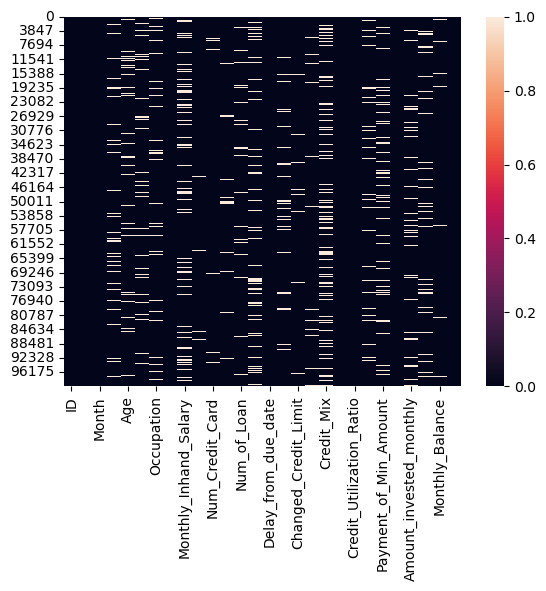

In [145]:
sns.heatmap(df.isnull())

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 100000 entries, 0 to 99999

Data columns (total 28 columns):

 #   Column                    Non-Null Count   Dtype  

---  ------                    --------------   -----  

 0   ID                        100000 non-null  object 

 1   Customer_ID               100000 non-null  object 

 2   Month                     100000 non-null  object 

 3   Name                      90015 non-null   object 

 4   Age                       92365 non-null   Int64  

 5   SSN                       94428 non-null   object 

 6   Occupation                92938 non-null   object 

 7   Annual_Income             100000 non-null  float64

 8   Monthly_Inhand_Salary     84998 non-null   float64

 9   Num_Bank_Accounts         98676 non-null   float64

 10  Num_Credit_Card           97693 non-null   float64

 11  Interest_Rate             97966 non-null   float64

 12  Num_of_Loan               95215 non-null   Int64  

 13  Type_of_Loan              8

In [147]:
df

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.84,3.0,...,NaN,809.98,26.82,22 Years and 1 Months,No,49.57,80.42,High_spent_Small_value_payments,312.49,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3.0,...,Good,809.98,31.94,NaN,No,49.57,118.28,Low_spent_Large_value_payments,284.63,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,<NA>,821-00-0265,Scientist,19114.12,NaN,3.0,...,Good,809.98,28.61,22 Years and 3 Months,No,49.57,81.70,Low_spent_Medium_value_payments,331.21,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3.0,...,Good,809.98,31.38,22 Years and 4 Months,No,49.57,199.46,Low_spent_Small_value_payments,223.45,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.84,3.0,...,Good,809.98,24.80,22 Years and 5 Months,No,49.57,41.42,High_spent_Medium_value_payments,341.49,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.42,4.0,...,NaN,502.38,34.66,31 Years and 6 Months,No,35.10,60.97,High_spent_Large_value_payments,479.87,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.42,4.0,...,NaN,502.38,40.57,31 Years and 7 Months,No,35.10,54.19,High_spent_Medium_value_payments,496.65,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.42,4.0,...,Good,502.38,41.26,31 Years and 8 Months,No,35.10,24.03,High_spent_Large_value_payments,516.81,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.42,4.0,...,Good,502.38,33.64,31 Years and 9 Months,No,35.10,251.67,Low_spent_Large_value_payments,319.16,Standard


# Encoding The Data

In [148]:
from sklearn.preprocessing import LabelEncoder

In [149]:
le = LabelEncoder()

for i in df.select_dtypes('object').columns:
    df[i] = le.fit_transform(df[i])

In [150]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5, weights="uniform")


In [151]:
y =df["Credit_Score"]

In [152]:
x =df[['Interest_Rate','Payment_of_Min_Amount', 'Num_of_Delayed_Payment'
      ,'Delay_from_due_date', 'Changed_Credit_Limit', 'Outstanding_Debt'
       ,'Num_of_Loan', 'Credit_History_Age']]

In [153]:
x=imputer.fit_transform(x)

In [154]:
x=pd.DataFrame(x,columns=[ 'Interest_Rate','Payment_of_Min_Amount', 'Num_of_Delayed_Payment'
      ,'Delay_from_due_date', 'Changed_Credit_Limit', 'Outstanding_Debt'
       ,'Num_of_Loan', 'Credit_History_Age'])

<AxesSubplot:>

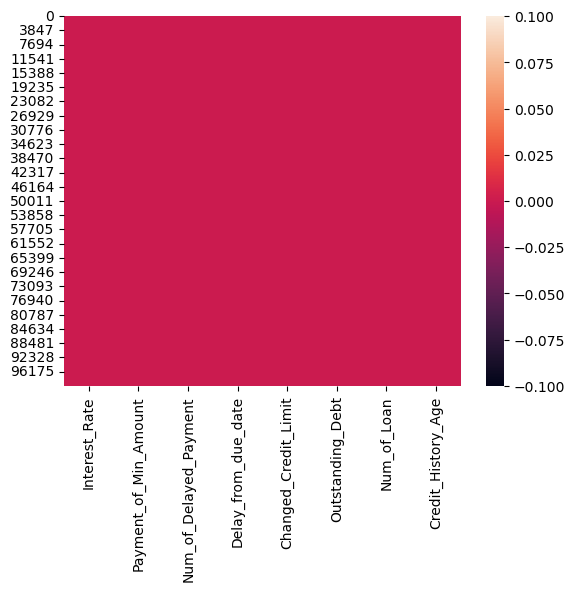

In [155]:
sns.heatmap(x.isnull())

In [156]:
df.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                            0
Age                          7635
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts            1324
Num_Credit_Card              2307
Interest_Rate                2034
Num_of_Loan                  4785
Type_of_Loan                    0
Delay_from_due_date             0
Num_of_Delayed_Payment       7734
Changed_Credit_Limit         2091
Num_Credit_Inquiries         3615
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age              0
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      8784
Payment_Behaviour               0
Monthly_Balance              1209
Credit_Score                    0
dtype: int64

In [157]:
from sklearn.model_selection import train_test_split

In [158]:
x_train , x_test ,y_train ,y_test =train_test_split(x,y ,test_size=0.25 ,random_state= 42)

In [159]:
print(x.shape)
print(x_train.shape)
print(x_test.shape)

(100000, 8)

(75000, 8)

(25000, 8)


def evaluate_model(y_test,y_pred):
    print("Classification Report")
    print(classification_report(y_test, y_pred))
    
    print("\n---------------------------------------------\n")
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Create a heatmap of the confusion matrix using Seaborn
    sns.heatmap(cm, annot=True, cmap='Greens',fmt='.0f')

    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')

    plt.show()

classifiers = [
    ('LogisticRegression',LogisticRegression(penalty ="l2" ,C=0.5)),
    ('Decision Tree', DecisionTreeClassifier(max_depth= 5,max_features=4)),
    ('Random Forest', RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)),
    ('KNN', KNeighborsClassifier(n_neighbors=5,metric="minkowski")),
    ('Gaussion NB',GaussianNB()),
    ('XGB',XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'))
]

# Iterate over each classifier and evaluate performance
for clf_name, clf in classifiers:
    # Perform cross-validation
    scores = cross_val_score(clf, x_train, y_train, cv=5, scoring='accuracy')
    
    # Calculate average performance metrics
    avg_accuracy = scores.mean()
    avg_precision = cross_val_score(clf, x_train, y_train, cv=5, scoring='precision_macro').mean()
    avg_recall = cross_val_score(clf, x_train, y_train, cv=5, scoring='recall_macro').mean()
    
    # Print the performance metrics
    print(f'Classifier: {clf_name}')
    print(f'Average Accuracy: {avg_accuracy:.4f}')
    print(f'Average Precision: {avg_precision:.4f}')
    print(f'Average Recall: {avg_recall:.4f}')
    print('-----------------------')

In [160]:
def train_evaluate_model(model, x_train, y_train, x_test,y_test):
    '''
    Keyword arguments:
    X -- Training data
    y -- Traing labels

    returns a dataframe for evaluating metrics
    '''
    
    model.fit(x_train, y_train)  #fit the model instance 


    predictions = model.predict(x_test) # calculate predictions

    #compute metrics for evaluation
    accuracy = accuracy_score(y_test, predictions)
    f1 = f1_score(y_test, predictions, average='weighted')
    precision = precision_score(y_test, predictions, average='weighted')
    recall = recall_score(y_test, predictions, average='weighted')
    balanced_accuracy = balanced_accuracy_score(y_test, predictions)

    #create a dataframe to visualize the results
    eval_df = pd.DataFrame([[accuracy, f1, precision, recall, balanced_accuracy]], columns=['accuracy', 'f1_score', 'precision', 'recall', 'balanced_accuracy'])
    return eval_df


In [161]:
lg = LogisticRegression(penalty ="l2" ,C=0.5)

results = train_evaluate_model(lg, x_train, y_train, x_test, y_test)

In [162]:
results.index = ['LogisticRegression']

In [163]:
results.sort_values(by='f1_score',ascending=False).style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

,accuracy,f1_score,precision,recall,balanced_accuracy
LogisticRegression,0.595520,0.565798,0.585166,0.595520,0.483961


In [164]:
decision_tree = DecisionTreeClassifier(max_depth= 5,max_features=4)
decision_tree_results = train_evaluate_model(decision_tree,x_train, y_train, x_test, y_test)

decision_tree_results.index = ['DecisionTree']

results = results.append(decision_tree_results)
results.sort_values(by='f1_score',ascending=False).style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

,accuracy,f1_score,precision,recall,balanced_accuracy
DecisionTree,0.653320,0.654796,0.660185,0.653320,0.623138
LogisticRegression,0.595520,0.565798,0.585166,0.595520,0.483961


In [165]:
KNN = KNeighborsClassifier(n_neighbors=19,metric="minkowski")

In [166]:
knn = train_evaluate_model(KNN, x_train, y_train, x_test, y_test)
knn.index =['KNearsNeighbors']
results = results.append(knn)

In [167]:
results.sort_values(by='f1_score',ascending=False).style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

,accuracy,f1_score,precision,recall,balanced_accuracy
KNearsNeighbors,0.677840,0.674591,0.674174,0.677840,0.629798
DecisionTree,0.653320,0.654796,0.660185,0.653320,0.623138
LogisticRegression,0.595520,0.565798,0.585166,0.595520,0.483961


In [168]:
rfc = RandomForestClassifier(max_features="sqrt") # تحديد sqrt كقيمة لـ max_features

In [169]:
rfc_result = train_evaluate_model(rfc, x_train, y_train, x_test, y_test)
rfc_result.index = ['RandomForest']

results = results.append(rfc_result)

In [170]:
results.sort_values(by='f1_score',
ascending=False).style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

,accuracy,f1_score,precision,recall,balanced_accuracy
RandomForest,0.762800,0.762797,0.762806,0.762800,0.744100
KNearsNeighbors,0.677840,0.674591,0.674174,0.677840,0.629798
DecisionTree,0.653320,0.654796,0.660185,0.653320,0.623138
LogisticRegression,0.595520,0.565798,0.585166,0.595520,0.483961


In [171]:
xgboost = XGBClassifier(learning_rate=0.1, n_estimators=100, max_depth=3, subsample=0.8, colsample_bytree=0.8)

xgboost_result = train_evaluate_model(xgboost, x_train, y_train, x_test, y_test)
xgboost_result.index = ['XGBoost']

results = results.append(xgboost_result)

In [172]:
results.sort_values(by='f1_score',ascending=False).style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

,accuracy,f1_score,precision,recall,balanced_accuracy
RandomForest,0.762800,0.762797,0.762806,0.762800,0.744100
XGBoost,0.677440,0.677720,0.681977,0.677440,0.645493
KNearsNeighbors,0.677840,0.674591,0.674174,0.677840,0.629798
DecisionTree,0.653320,0.654796,0.660185,0.653320,0.623138
LogisticRegression,0.595520,0.565798,0.585166,0.595520,0.483961


In [173]:
Naive_Bayes = GaussianNB()
Naive_Bayes_result = train_evaluate_model(Naive_Bayes, x_train, y_train, x_test, y_test)
Naive_Bayes_result.index = ['NaiveBayes']

results = results.append(Naive_Bayes_result)

In [174]:
results.sort_values(by='f1_score',ascending=False).style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

,accuracy,f1_score,precision,recall,balanced_accuracy
RandomForest,0.762800,0.762797,0.762806,0.762800,0.744100
XGBoost,0.677440,0.677720,0.681977,0.677440,0.645493
KNearsNeighbors,0.677840,0.674591,0.674174,0.677840,0.629798
DecisionTree,0.653320,0.654796,0.660185,0.653320,0.623138
NaiveBayes,0.594120,0.598759,0.647992,0.594120,0.644907
LogisticRegression,0.595520,0.565798,0.585166,0.595520,0.483961
